1) Delivery_time -> Predict delivery time using sorting time

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/delivery_time.csv')

In [ ]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
#Data structure
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(21, 2)


In [ ]:
data.dtypes #cheack data type of all varibles

Delivery Time    float64
Sorting Time       int64
dtype: object

In [ ]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.duplicated() #if any two rows has same value

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [ ]:
#count duplicated rows
data[data.duplicated()].shape

(0, 2)

In [ ]:
#print the duplicated rows
data[data.duplicated()]

,Delivery Time,Sorting Time


<Axes: >

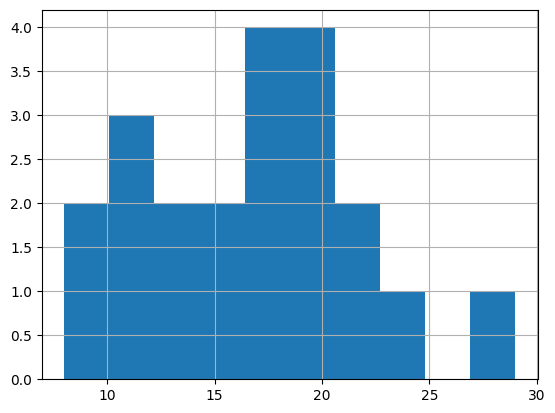

In [ ]:
#histogram of Delivery Time
data['Delivery Time'].hist()

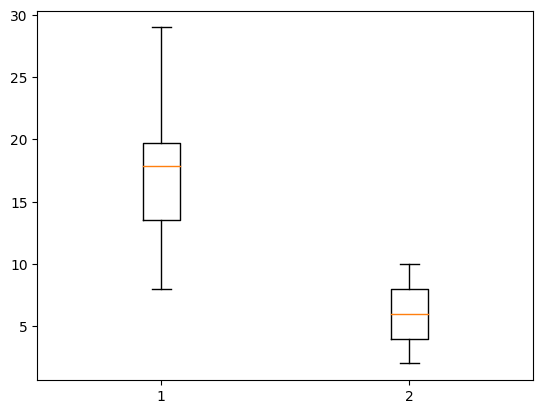

In [ ]:
plt.boxplot(data)
plt.show()  #no outlier present

<ipython-input-19-999583026acc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Delivery Time"])


<Axes: xlabel='Delivery Time', ylabel='Density'>

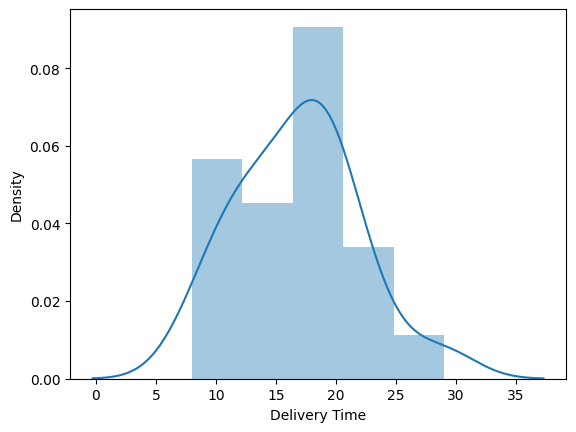

In [ ]:
import seaborn as sns
sns.distplot(data["Delivery Time"])

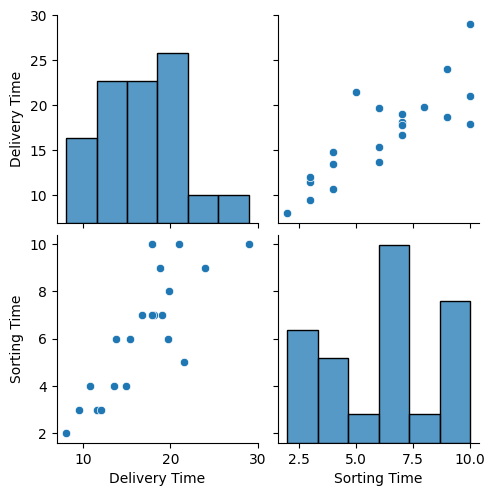

In [ ]:
sns.pairplot(data)

In [ ]:
data=data.rename({"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},axis=1)


#Correlation

In [ ]:
data.corr()  #correlation analysis

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


#Model Buliding

In [ ]:
import statsmodels.formula.api as smf # model -Regession model
model=smf.ols("sorting_time~delivery_time",data=data).fit()

In [ ]:
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [ ]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.682271474841723, 0.6655489208860242)

In [ ]:
model.predict(data)

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

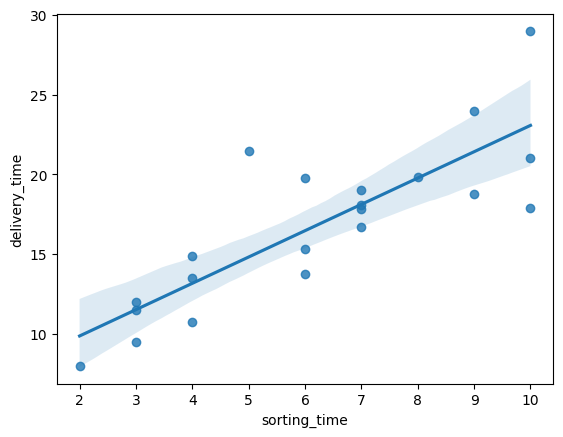

In [ ]:
sns.regplot(x="sorting_time",y="delivery_time",data=data)